# Project Five
# Game of Thrones - TSNE

In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from textblob import TextBlob
from nltk.corpus import stopwords
import spacy
from nltk import Tree
from nltk.grammar import DependencyGrammar
from nltk.parse import DependencyGraph
from nltk.parse import ProjectiveDependencyParser
from nltk.parse import NonprojectiveDependencyParser
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim
from gensim.models import Word2Vec
from nltk.tag import pos_tag
import re
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

Using Theano backend.


In [2]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale

from sklearn.datasets import fetch_mldata
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

In [3]:
import pickle

with open('/Users/zoemarkovits/Metis/project_five_got/total_corpus_texts2.pkl', 'rb') as f:
    total_corpus_texts = pickle.load(f)

In [4]:
#total_corpus_texts

In [5]:
import gensim  
model = gensim.models.Word2Vec(total_corpus_texts, size=100, window=5, min_count=1, workers=2,sg=1)

In [6]:
#model.wv.vocab.items()

In [7]:
keys = model.wv.vocab.keys()

In [8]:
#keys[:1000]

In [9]:
len(keys)

6913

In [10]:
model_list = []

for i in model.wv.vocab.keys():
    model_list.append(model.wv[i])

In [11]:
#model_list

In [12]:
type(model_list)

list

In [13]:
model_vectors = pd.DataFrame(model_list)
model_vectors.shape

(6913, 100)

In [14]:
model_vectors = model_vectors.reset_index()

In [15]:
model_vectors['index'] = model.wv.vocab.keys()

In [16]:
model_vectors = model_vectors.set_index('index')

In [17]:
model_vectors.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
index,,,,,,,,,,,,,,,,,,,,,
foul,-0.218654,-0.027364,-0.023232,-0.131118,-0.114012,-0.083380,-0.114504,-0.175055,-0.014141,-0.166587,...,0.053869,0.022585,-0.188218,-0.142740,-0.060842,0.096330,-0.210394,0.005359,-0.145331,0.017226
four,-0.293096,-0.036543,-0.031105,-0.183357,-0.141922,-0.105301,-0.161730,-0.239589,-0.030433,-0.218020,...,0.072156,0.026520,-0.254000,-0.187309,-0.079068,0.132528,-0.288155,0.017056,-0.186769,0.017705
hanging,-0.142592,-0.023325,-0.016245,-0.086581,-0.067443,-0.055951,-0.080246,-0.113121,-0.014612,-0.100433,...,0.038504,0.016233,-0.126011,-0.088626,-0.046522,0.067029,-0.143059,0.005345,-0.088576,0.004783
marching,-0.273864,-0.026567,-0.029183,-0.163723,-0.137326,-0.101785,-0.152119,-0.235684,-0.031656,-0.204260,...,0.068594,0.031115,-0.234124,-0.181307,-0.084742,0.123341,-0.269796,0.006617,-0.177038,0.018447
increase,-0.051937,-0.001778,-0.009247,-0.032927,-0.025882,-0.019178,-0.031071,-0.050102,-0.007619,-0.040801,...,0.017198,0.001653,-0.042475,-0.038182,-0.019697,0.021387,-0.049704,0.006339,-0.038823,0.004485


In [18]:
#model_vectors.index

In [19]:
pca20 = PCA(n_components=20)

pca_results20 = pca20.fit_transform(model_vectors)

In [20]:
pca_results_20 = pd.DataFrame(pca_results20)

In [21]:
pca_results_20 = pca_results_20.reset_index()

In [22]:
pca_results_20['index'] = model.wv.vocab.keys()

In [23]:
pca_results_20 = pca_results_20.set_index('index')

In [24]:
pca_results_20.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
index,,,,,,,,,,,,,,,,,,,,
foul,0.468770,-0.009045,-0.029245,0.001658,0.008366,-0.008247,0.004345,0.002848,0.000194,-0.002274,-0.001368,-0.004776,-0.005092,0.005728,-0.001556,-0.001564,-0.001654,-0.001605,0.002081,-0.001782
four,0.850347,-0.014116,-0.018141,0.027650,0.007363,-0.001497,0.001287,0.013800,-0.003867,0.008000,-0.009278,-0.002973,-0.000411,0.002175,0.002762,0.002501,0.000286,0.003737,-0.003062,0.006699
hanging,0.055674,-0.004804,-0.011386,0.009512,0.000497,0.000590,0.005763,-0.003611,-0.005546,-0.003415,-0.005987,0.000168,-0.004704,0.002024,-0.001859,-0.003199,0.005054,0.000332,-0.003998,-0.005197
marching,0.769213,0.000508,-0.004483,0.029171,-0.006890,-0.009850,-0.013947,-0.004011,-0.007630,-0.003705,0.000345,0.000917,-0.002420,-0.007940,0.003777,0.001678,-0.002073,-0.001461,0.003263,0.005523
increase,-0.414847,0.002268,0.002403,-0.001323,-0.001262,0.007411,0.000620,0.001211,-0.003891,-0.000784,-0.000452,0.002468,0.004901,-0.000261,-0.002956,0.001096,-0.007241,0.002715,0.000395,0.001941


In [25]:
tsne = TSNE(n_components=2)

tsne_pca_results20 = tsne.fit_transform(pca_results20)

In [26]:
tsne_pca_results_20 = pd.DataFrame(tsne_pca_results20)

In [27]:
tsne_pca_results_20.head()

,0,1
0,2.615727e+16,-2.259377e+16
1,3.973108e+17,-1.237215e+17
2,-3.177302e+16,-1.212340e+17
3,-6.004931e+16,1.514099e+15
4,2.820258e+18,-1.127105e+18


In [28]:
tsne_pca_results_20 = tsne_pca_results_20.reset_index()

In [29]:
tsne_pca_results_20['index'] = model.wv.vocab.keys()

In [30]:
tsne_pca_results_20 = tsne_pca_results_20.set_index('index')

In [31]:
tsne_pca_results_20.shape

(6913, 2)

In [32]:
tsne_pca_results_20.head(10)

,0,1
index,,
foul,2.615727e+16,-2.259377e+16
four,3.973108e+17,-1.237215e+17
hanging,-3.177302e+16,-1.212340e+17
marching,-6.004931e+16,1.514099e+15
increase,2.820258e+18,-1.127105e+18
midafternoon,1.437937e+17,-3.411435e+16
mutinied,3.780130e+17,-4.415521e+16
lord,3.353255e+17,-1.568275e+17
sinking,5.642097e+15,-1.160849e+17


In [33]:
topwords_index = tsne_pca_results_20.loc[:'nastiness']
print topwords_index.shape
topwords_index.head()

(1000, 2)


,0,1
index,,
foul,2.615727e+16,-2.259377e+16
four,3.973108e+17,-1.237215e+17
hanging,-3.177302e+16,-1.212340e+17
marching,-6.004931e+16,1.514099e+15
increase,2.820258e+18,-1.127105e+18


In [34]:
topwords_index.to_csv('tsne2.csv', index=False)

In [35]:
tsne_pca_results_20 = tsne_pca_results_20.reset_index()

In [36]:
tsne_pca_results_20.head()

,index,0,1
0,foul,2.615727e+16,-2.259377e+16
1,four,3.973108e+17,-1.237215e+17
2,hanging,-3.177302e+16,-1.212340e+17
3,marching,-6.004931e+16,1.514099e+15
4,increase,2.820258e+18,-1.127105e+18


In [37]:
json_data = pd.DataFrame(tsne_pca_results_20['index'])
json_data['null'] = np.NaN

In [38]:
json_data.set_index('index', inplace=True)

In [39]:
#json_data

In [40]:
json_data.to_json('D3_json_Data', orient="index")

In [41]:
tsne_pca_results_20.shape

(6913, 3)

In [42]:
tsne_pca_results_20.to_csv('D3_TSNE.csv', index=False)

In [44]:
topwords = tsne_pca_results_20.loc[:999]
#topwords

In [45]:
topwords.to_csv('tsne3.csv', index=False)

In [46]:
tsne_pca_results_20.shape

(6913, 3)

In [47]:
tsne_pca_results_20 = tsne_pca_results_20.set_index('index')

In [48]:
tsne_pca_results20

array([[  2.61572714e+16,  -2.25937731e+16],
       [  3.97310770e+17,  -1.23721456e+17],
       [ -3.17730219e+16,  -1.21233997e+17],
       ..., 
       [  1.06766837e+17,  -3.48641910e+16],
       [  7.65081228e+16,   1.13769645e+15],
       [  1.27699397e+15,  -5.13800496e+15]])

In [49]:
tsne_pca_results_20.index

Index([        u'foul',         u'four',      u'hanging',     u'marching',
           u'increase', u'midafternoon',     u'mutinied',         u'lord',
            u'sinking',    u'leisurely',
       ...
              u'lance',       u'risked',       u'squeak',       u'oberyn',
              u'cliff',    u'auxiliary',        u'wylla',    u'firestorm',
         u'baratheons',  u'furthermore'],
      dtype='object', name=u'index', length=6913)

In [50]:
tsne_pca_results_20.head()

,0,1
index,,
foul,2.615727e+16,-2.259377e+16
four,3.973108e+17,-1.237215e+17
hanging,-3.177302e+16,-1.212340e+17
marching,-6.004931e+16,1.514099e+15
increase,2.820258e+18,-1.127105e+18


In [51]:
tsne_pca_results_20.shape

(6913, 2)

In [53]:
#tsne_pca_results_20.head(100)

In [55]:
#import numpy as Math
#import pylab as Plot
#import matplotlib.pyplot as plt

#rows = tsne_pca_results_20.index
#%matplotlib notebook
#plt.ion()

#Plot.figure(figsize=(20, 10))
#max_x = Math.amax(tsne_pca_results20, axis=0)[0]
#max_y = Math.amax(tsne_pca_results20, axis=0)[1]
#Plot.xlim((-.125e+20,.25e+20))
#Plot.ylim((-.125+e20,.1e20))

#Plot.scatter(tsne_pca_results20[:, 0], tsne_pca_results20[:, 1], 20);

#for row_id in range(0, len(rows)):
    #target_word = rows[row_id]
    #x = tsne_pca_results20[row_id, 0]
    #y = tsne_pca_results20[row_id, 1]
    #Plot.annotate(target_word, (x,y))

#Plot.savefig("tsne_200.png");

In [56]:
tsne_pca_results_20.loc['problem']

0    2.589892e+17
1    1.013316e+18
Name: problem, dtype: float64

In [57]:
tsne_pca_results_20.loc['serve']

0   -1.945895e+16
1   -3.664543e+16
Name: serve, dtype: float64

In [58]:
tsne_pca_results_20.loc['troubled']

0   -1.780269e+17
1   -3.593018e+16
Name: troubled, dtype: float64

In [59]:
tsne_pca_results_20.loc['amuse']

0    1.084516e+16
1   -5.485388e+16
Name: amuse, dtype: float64

In [60]:
# X and Y Limits
# X Min: -5.011046e+17
# X Max: 3.689624e+17
# Y Min: -9.293477e+17
# Y Max: 9.785711e+17

In [61]:
#import numpy as Math
#import pylab as Plot
#import matplotlib.pyplot as plt

#rows = tsne_pca_results_20.index
#%matplotlib notebook
#plt.ion()

#Plot.figure(figsize=(20, 10))
#max_x = Math.amax(tsne_pca_results20, axis=0)[0]
#max_y = Math.amax(tsne_pca_results20, axis=0)[1]
#Plot.xlim((-3.011046e+17,3.689624e+17))
#Plot.ylim((-9.293477e+17,9.785711e+17))

#Plot.scatter(tsne_pca_results20[:, 0], tsne_pca_results20[:, 1], 20);

#for row_id in range(0, len(rows)):
    #target_word = rows[row_id]
    #x = tsne_pca_results20[row_id, 0]
    #y = tsne_pca_results20[row_id, 1]
    #Plot.annotate(target_word, (x,y))

#Plot.savefig("tsne_2000.png");

In [62]:
tsne_pca_results_20.loc['fortnight']

0    2.431990e+16
1   -2.362574e+16
Name: fortnight, dtype: float64

In [63]:
tsne_pca_results_20.loc['grenns']

0    5.129192e+16
1   -3.922427e+16
Name: grenns, dtype: float64

In [64]:
tsne_pca_results_20.loc['text']

0    8.006613e+16
1   -3.336720e+16
Name: text, dtype: float64

In [65]:
# X and Y Limits (Part 2)
# X Min: -1.005918e+17
# X Max: 1.005918e+17
# Y Min: -3.319169e+17
# Y Max: 3.319169e+17

<IPython.core.display.Javascript object>


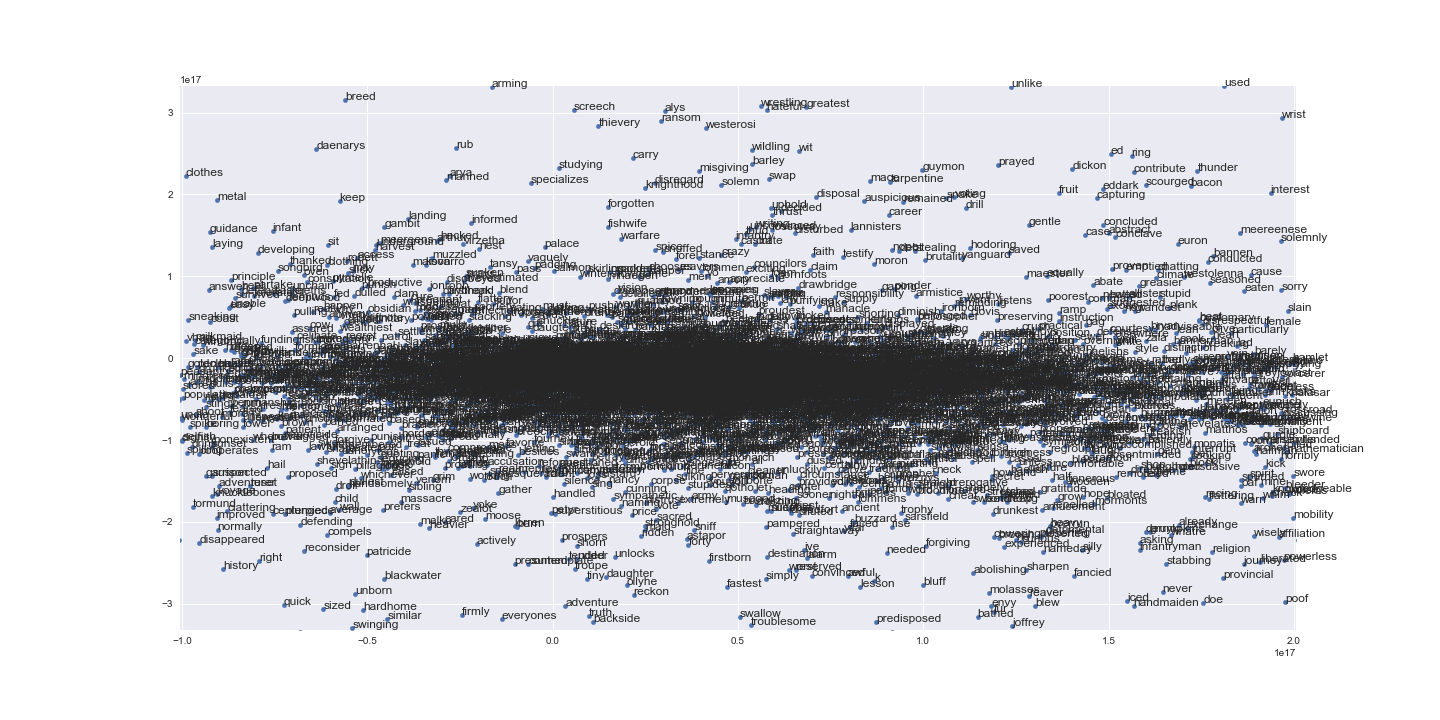

In [66]:
import numpy as Math
import pylab as Plot
import matplotlib.pyplot as plt

rows = tsne_pca_results_20.index
%matplotlib notebook
plt.ion()

Plot.figure(figsize=(20, 10))
max_x = Math.amax(tsne_pca_results20, axis=0)[0]
max_y = Math.amax(tsne_pca_results20, axis=0)[1]
Plot.xlim((-1.005918e+17,2.005918e+17))
Plot.ylim((-3.319169e+17,3.319169e+17))

Plot.scatter(tsne_pca_results20[:, 0], tsne_pca_results20[:, 1], 20);

for row_id in range(0, len(rows)):
    target_word = rows[row_id]
    x = tsne_pca_results20[row_id, 0]
    y = tsne_pca_results20[row_id, 1]
    Plot.annotate(target_word, (x,y))

Plot.savefig("tsne_2002.png");

In [67]:
tsne_pca_results20

array([[  2.61572714e+16,  -2.25937731e+16],
       [  3.97310770e+17,  -1.23721456e+17],
       [ -3.17730219e+16,  -1.21233997e+17],
       ..., 
       [  1.06766837e+17,  -3.48641910e+16],
       [  7.65081228e+16,   1.13769645e+15],
       [  1.27699397e+15,  -5.13800496e+15]])

In [68]:
topwords_matrix = topwords.as_matrix(columns=(0,1))
topwords_matrix

array([[  2.61572714e+16,  -2.25937731e+16],
       [  3.97310770e+17,  -1.23721456e+17],
       [ -3.17730219e+16,  -1.21233997e+17],
       ..., 
       [  1.67766408e+17,  -1.36886393e+17],
       [  6.73756932e+17,  -4.97614232e+16],
       [ -2.56758021e+17,  -3.78630237e+16]])

In [69]:
len(topwords_matrix)

1000

In [70]:
topwords_index.head()

,0,1
index,,
foul,2.615727e+16,-2.259377e+16
four,3.973108e+17,-1.237215e+17
hanging,-3.177302e+16,-1.212340e+17
marching,-6.004931e+16,1.514099e+15
increase,2.820258e+18,-1.127105e+18


In [71]:
topwords_index.describe()

,0,1
count,1.000000e+03,1.000000e+03
mean,1.008447e+16,7.308214e+15
std,1.075284e+18,1.235247e+18
min,-2.014671e+19,-8.489110e+18
25%,-6.932551e+15,-6.570661e+16
50%,3.059045e+16,-2.681469e+16
75%,9.045166e+16,-6.945108e+15
max,8.515067e+18,2.653144e+19


<IPython.core.display.Javascript object>


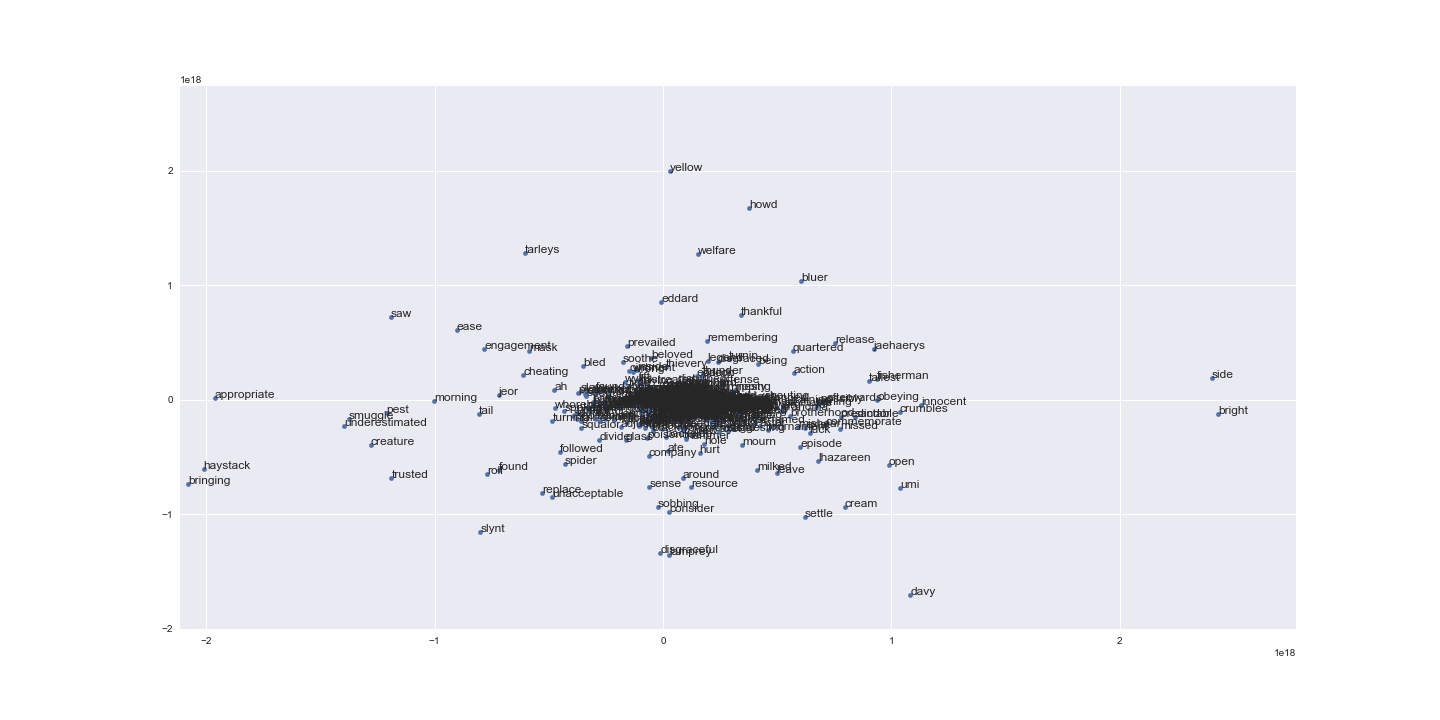

In [72]:
import numpy as Math
import pylab as Plot
import matplotlib.pyplot as plt

rows = topwords_index.index
%matplotlib notebook
plt.ion()

Plot.figure(figsize=(20, 10))
max_x = Math.amax(topwords_matrix, axis=0)[0]
max_y = Math.amax(topwords_matrix, axis=0)[1]
#Plot.xlim((-.125e+20,.25e+20))
#Plot.ylim((-.125+e20,.1e20))

Plot.scatter(topwords_matrix[:, 0], topwords_matrix[:, 1], 20);

for row_id in range(0, len(rows)):
    target_word = rows[row_id]
    x = topwords_matrix[row_id, 0]
    y = topwords_matrix[row_id, 1]
    Plot.annotate(target_word, (x,y))

Plot.savefig("tsne_top.png");